In [21]:
# ----------------------------------------------------------
# 1. IMPORT LIBRARIES
# ----------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [22]:
# ----------------------------------------------------------
# 2. LOAD THE DATASET
# ----------------------------------------------------------
df = pd.read_csv("test.csv", header=None, names=["label", "title", "text"])

print("Initial Dataset Shape:", df.shape)
df.head()

Initial Dataset Shape: (400000, 3)


,label,title,text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [23]:
# ----------------------------------------------------------
# 3. CHECK FOR MISSING VALUES
# ----------------------------------------------------------
print("\nMissing Values (Before):")
print(df.isnull().sum())

# Since dataset has 0 missing values, introduce missingness




Missing Values (Before):
label     0
title    24
text      0
dtype: int64


In [24]:
# ----------------------------------------------------------
# 4. INTRODUCE 5% MISSING VALUES IN label AND text
# ----------------------------------------------------------
df_missing = df.copy()

# 5% missing in label
df_missing.loc[df_missing.sample(frac=0.05).index, "label"] = np.nan

# 5% missing in text
df_missing.loc[df_missing.sample(frac=0.05).index, "text"] = np.nan

print("\nMissing Values (After Introducing):")
print(df_missing.isnull().sum())




Missing Values (After Introducing):
label    20000
title       24
text     20000
dtype: int64


In [25]:
# ----------------------------------------------------------
# 5. HANDLE MISSING VALUES
# ----------------------------------------------------------
# Fill missing labels with mode
df_missing["label"] = df_missing["label"].fillna(df_missing["label"].mode()[0])

# Fill missing text with placeholder
df_missing["text"] = df_missing["text"].fillna("missing text")

print("\nMissing Values (After Imputation):")
print(df_missing.isnull().sum())


Missing Values (After Imputation):
label     0
title    24
text      0
dtype: int64


In [26]:
# ----------------------------------------------------------
# 6. CLEAN TEXT (WITHOUT NLTK)
# ----------------------------------------------------------
def clean_text(txt):
    txt = str(txt).lower()                                # lowercase
    txt = re.sub(r"[^a-zA-Z0-9\s]", "", txt)              # remove punctuation
    tokens = txt.split()                                  # tokenize
    return " ".join(tokens)

df_missing["clean_text"] = df_missing["text"].apply(clean_text)

df_missing[["text", "clean_text"]].head()


,text,clean_text
0,My lovely Pat has one of the GREAT voices of h...,my lovely pat has one of the great voices of h...
1,Despite the fact that I have only played a sma...,despite the fact that i have only played a sma...
2,I bought this charger in Jul 2003 and it worke...,i bought this charger in jul 2003 and it worke...
3,Check out Maha Energy's website. Their Powerex...,check out maha energys website their powerex m...
4,Reviewed quite a bit of the combo players and ...,reviewed quite a bit of the combo players and ...


In [27]:
# ----------------------------------------------------------
# 7. ENCODE CATEGORICAL VARIABLES USING PANDAS ONLY
# ----------------------------------------------------------
df_missing["title_encoded"] = df_missing["title"].astype("category").cat.codes



In [28]:
# ----------------------------------------------------------
# 8. CREATE SYNTHETIC TIMESTAMPS AND DATE FEATURES
# ----------------------------------------------------------
# Generate random timestamps between 2010–2014
start = pd.Timestamp("2010-01-01").value // 10**9
end = pd.Timestamp("2014-12-31").value // 10**9

df_missing["timestamp"] = np.random.randint(start, end, size=len(df_missing))

# Convert to datetime
df_missing["date"] = pd.to_datetime(df_missing["timestamp"], unit='s')

# Extract new features
df_missing["year"] = df_missing["date"].dt.year
df_missing["month"] = df_missing["date"].dt.month

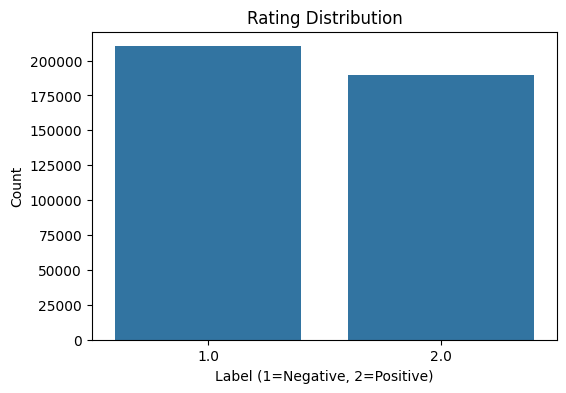

In [29]:
# ----------------------------------------------------------
# 9. VISUALIZATION: RATING DISTRIBUTION
# ----------------------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df_missing, x="label")
plt.title("Rating Distribution")
plt.xlabel("Label (1=Negative, 2=Positive)")
plt.ylabel("Count")
plt.show()



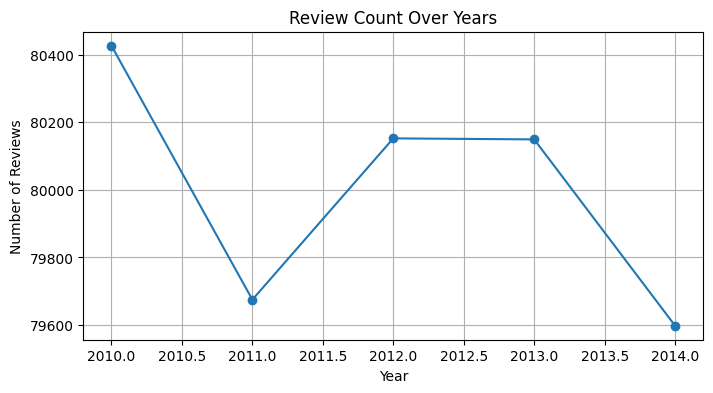

In [30]:
# ----------------------------------------------------------
# 10. VISUALIZATION: REVIEWS PER YEAR
# ----------------------------------------------------------
plt.figure(figsize=(8,4))
df_missing.groupby("year").size().plot(kind="line", marker="o")
plt.title("Review Count Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()


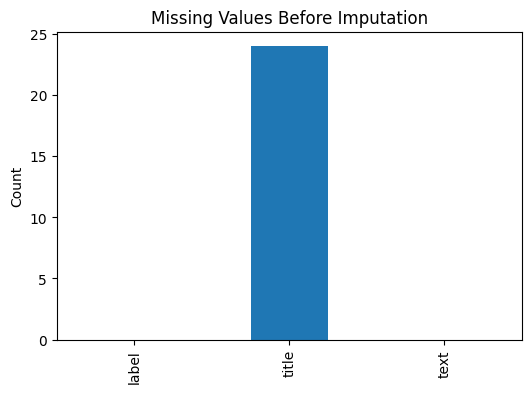

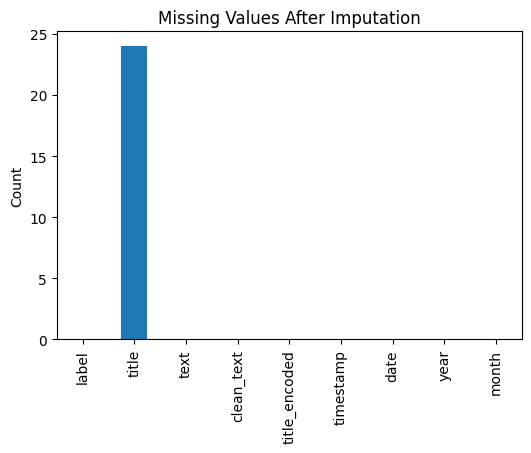

In [31]:
# ----------------------------------------------------------
# 11. VISUALIZATION: MISSING VALUES BEFORE & AFTER
# ----------------------------------------------------------
plt.figure(figsize=(6,4))
df.isnull().sum().plot(kind="bar")
plt.title("Missing Values Before Imputation")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
df_missing.isnull().sum().plot(kind="bar")
plt.title("Missing Values After Imputation")
plt.ylabel("Count")
plt.show()



In [32]:
# ----------------------------------------------------------
# 12. FINAL OUTPUT PREVIEW
# ----------------------------------------------------------
df_missing.head()

,label,title,text,clean_text,title_encoded,timestamp,date,year,month
0,2.0,Great CD,My lovely Pat has one of the GREAT voices of h...,my lovely pat has one of the great voices of h...,104701,1385249131,2013-11-23 23:25:31,2013,11
1,2.0,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,despite the fact that i have only played a sma...,190278,1310375575,2011-07-11 09:12:55,2011,7
2,1.0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,i bought this charger in jul 2003 and it worke...,36538,1405820455,2014-07-20 01:40:55,2014,7
3,2.0,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,check out maha energys website their powerex m...,327203,1393758803,2014-03-02 11:13:23,2014,3
4,2.0,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,reviewed quite a bit of the combo players and ...,111112,1310788936,2011-07-16 04:02:16,2011,7
